<a href="https://colab.research.google.com/github/cascadet/PopGrid-SDG11.5-Tutorial/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cliping Step for Raster Based on Imported Country Shapefile

# By Cascade Tuholske, Sep 2020 <br>
# Notebook to clip rasters. <br>
# **NOTE** Needs to be run for all geographies: Egypt forEGY.shp, Nepal gdam 0, M-M-Z0.shp, and ECU-clip0.shp


In [ ]:
# first step is to install some libraries 1. install rioxarray 

In [3]:
pip install rioxarray


     |████████████████████████████████| 46 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 3.9 MB/s 
     |████████████████████████████████| 6.3 MB 43.1 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.8.0-py3-none-any.whl size=54247 sha256=a9789ea85fd607558a87e65f1363a114f3c17948994bf8d60105248cbf9972ad
  Stored in directory: /root/.cache/pip/wheels/0a/e5/fb/5ac6dcd7faf126d92239d03f0e7d6c46648094d7a8706d2a63
Successfully built rioxarray


In [4]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 28.8 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [5]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio 
import xarray as xr
import geopandas as gpd
import glob
import rioxarray as rio
from scipy.stats import variation 
import rasterio.mask

In [7]:
#### File Paths & FNs
DATA_PATH = '/content/drive/MyDrive/PopGrid-Compare/'
DATA_PATH_OUT = '/content/drive/MyDrive/pop/'

In [8]:
def raster_clip(rst_fn, polys, in_ext, out_ext):
    
    """ function clips a raster and saves it out
    args:
        rst_fn = raster you want to clip
        polys = polys you want to clip to
        in_ext = tail of .tif file to clip off
        out_ext = tail of .tif file for saving out 
    """
    
    # Get raster name
        #rst_nm = rst_fn.split('interim\\')[1].split('.tif')[0]
        #data = rst_fn.split(DATA_PATH+'interim/')[1].split(in_ext)[0]

    data = rst_fn.split(DATA_PATH+'interim/')[1].split(in_ext)[0]
    fn_out = DATA_PATH_OUT+'interim/'+data+out_ext
    print(fn_out)
    
    # clip raster
    with rasterio.open(rst_fn) as src:
        out_image, out_transform = rasterio.mask.mask(src, polys, crop=True)
        out_meta = src.meta
        
    # Update meta data
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
    # write image 
    with rasterio.open(fn_out, "w", **out_meta) as dest:
        dest.write(out_image)

In [11]:
#### Matched Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/PopGrid-Compare/interim/*_matched.tif')
rst_fns

# Open polys
country = '_EGY.tif'#'_NPL.tif'#'_ECU.tif'#'_MMZ.tif'#'_NPL.tif'
polys_fn = DATA_PATH_OUT+ 'interim/EGY.shp'#'interim/chile_quake_pop.shp' #'interim/M-M-Z-0.shp'
#hazem-polys_fn = DATA_PATH+ 'interim/M-M-Z-0.shp'#gwpv4_npl_admin4.shp'#'interim/ECU-clip0.shp' #'interim/M-M-Z-0.shp'
polys = gpd.read_file(polys_fn)
shapes = polys["geometry"]

in_ext = '_matched.tif'
out_ext = '_all'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/pop/interim/WP16_all_EGY.tif
/content/drive/MyDrive/pop/interim/LS15_all_EGY.tif
/content/drive/MyDrive/pop/interim/GPWv4_all_EGY.tif
/content/drive/MyDrive/pop/interim/GHS15_all_EGY.tif
/content/drive/MyDrive/pop/interim/ESRI16_all_EGY.tif


In [12]:
#### Urban Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/PopGrid-Compare/interim/*_urban.tif')
rst_fns

in_ext = 'matched_urban.tif'
out_ext = 'urban'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

In [ ]:
#### Rural Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/pop/interim/*_rural.tif')
rst_fns

in_ext = 'matched_rural.tif'
out_ext = 'rural'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/pop/interim/GPWv4_rural_EGY.tif


In [ ]:
#### Rural Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/pop/interim/*_rural.tif')
rst_fns

in_ext = 'matched_rural.tif'
out_ext = 'rural'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/pop/interim/GPWv4_rural_EGY.tif


In [ ]:
#### Urban Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/pop/interim/*_urban.tif')
rst_fns

in_ext = 'matched_urban.tif'
out_ext = 'urban'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/pop/interim/GPWv4_urban_EGY.tif


In [ ]:
## Quake

# By Cascade Tuholske, June 2020

# Notebook finds zonal stats of populations for 2015 Nepal earthquakes by raster. <br><br>
# **NOTE** CRS should be epsg:4326 for everything!

In [ ]:
pip install rasterstats

     |████████████████████████████████| 129 kB 9.1 MB/s 


In [ ]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats
from glob import glob
from matplotlib import pyplot as plt
import matplotlib.patches as patches
Patch = patches.Patch

In [ ]:
#### Functions
def zone_loop(polys_in, rst_list, stats_type, col, split):
    """ Function loops through rasters, calcs zonal_stats and returns stats as a data frame.
    Args:
        polys_in = polygons
        rst_list = list of paths & fns of rasters
        stats_type = stats type for each poly gone (see zonal stats)
        col = column to merge it all
        split = where to split the file name string (e.g. _matched.tif)
    """
    
    # copy polys to write out
    polys_out = polys_in.copy()
    
    for rst in rst_list:
        
        # Get data name
        data = rst.split(DATA_PATH+'interim/')[1].split(split)[0]
        print('Started', data)
        
        # Run zonal stats
        zs_feats = zonal_stats(polys_in, rst, stats=stats_type, geojson_out=True)
        zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
        
        # Rename columns and merge
        zgdf = zgdf.rename(columns={stats_type: data+'_'+stats_type})
        
        polys_out = polys_out.merge(zgdf[[col, data+'_'+stats_type]], on = col, how = 'inner')
    
    return polys_out

In [ ]:
def poly_prep(polys_fn, col):
    "function opens earth quake polygons for zonal loop"
    
    # open
    polys = gpd.read_file(polys_fn)
    
    # subset, be sure to check the admin level
    polys = polys[['geometry', col]]
    
    return polys

In [ ]:
## Run on Shakemap Intensity Contours (MI) from USGS for this example: Nepal 2015


In [ ]:
#### All

In [ ]:
# open polys
DATA_PATH = '/content/drive/MyDrive/pop/'
nepal_polys_fn = DATA_PATH+'interim/shakemap/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)
print (nepal_polys)

                                             geometry  PARAMVALUE
0   MULTIPOLYGON (((32.52517 28.99167, 32.52510 28...         3.6
1   MULTIPOLYGON (((32.61249 30.95833, 32.61118 30...         3.8
2   MULTIPOLYGON (((30.19517 30.81667, 30.19349 30...         4.0
3   MULTIPOLYGON (((31.42556 30.93333, 31.42560 30...         4.2
4   MULTIPOLYGON (((31.39298 30.65833, 31.39246 30...         4.4
5   MULTIPOLYGON (((31.26388 30.45000, 31.25932 30...         4.6
6   MULTIPOLYGON (((31.10926 30.30833, 31.10892 30...         4.8
7   MULTIPOLYGON (((31.11246 30.30833, 31.11097 30...         5.0
8   MULTIPOLYGON (((30.98132 30.21667, 30.97946 30...         5.2
9   MULTIPOLYGON (((31.21830 30.13333, 31.21823 30...         5.4
10  MULTIPOLYGON (((31.22086 30.13333, 31.22070 30...         5.6
11  MULTIPOLYGON (((31.23997 30.11667, 31.23756 30...         5.8
12  MULTIPOLYGON (((31.28398 30.04167, 31.28364 30...         6.0
13  MULTIPOLYGON (((31.15894 30.00833, 31.15862 30...         6.2
14  MULTIP

In [ ]:
# Git tif files
rst_fns = sorted(glob(DATA_PATH+'interim/*all_EGY.tif'))
rst_fns

['/content/drive/MyDrive/pop/interim/GPWv4_all_EGY.tif']

In [ ]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_all_EGY.tif')

Started GPWv4


In [ ]:
# Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/EGY_quake_pop.shp')

In [ ]:
#### Urban

In [ ]:
# open polys
DATA_PATH = '/content/drive/MyDrive/pop/'
nepal_polys_fn = DATA_PATH+'interim/shakemap/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [ ]:
# Git tif files
rst_fns = sorted(glob(DATA_PATH+'interim/*_urban_EGY.tif'))
rst_fns

['/content/drive/MyDrive/pop/interim/GPWv4_urban_EGY.tif']

In [ ]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_urban_EGY.tif')


Started GPWv4


In [ ]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/EGY_urban_quake_pop.shp')

In [ ]:
#### Rural

In [ ]:
# open polys
DATA_PATH = '/content/drive/MyDrive/pop/'
nepal_polys_fn = DATA_PATH+'interim/shakemap/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [ ]:
# Git tif files
rst_fns = glob(DATA_PATH+'interim/*_rural_EGY.tif')
rst_fns

['/content/drive/MyDrive/pop/interim/GPWv4_rural_EGY.tif']

In [ ]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_rural_EGY.tif')


Started GPWv4


In [ ]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/EGY_rural_quake_pop.shp')

In [ ]:
# Check data

In [ ]:
# All
fn_in = DATA_PATH+'/interim/EGY_quake_pop.shp'
all_pop = gpd.read_file(fn_in)
all_pop

,PARAMVALUE,GPWv4_sum,geometry
0,3.6,5.035049e+02,"MULTIPOLYGON (((32.52517 28.99167, 32.52510 28..."
1,3.8,1.819472e+04,"MULTIPOLYGON (((32.61249 30.95833, 32.61118 30..."
2,4.0,3.038170e+05,"MULTIPOLYGON (((30.19517 30.81667, 30.19349 30..."
3,4.2,4.066633e+06,"MULTIPOLYGON (((31.42556 30.93333, 31.42560 30..."
4,4.4,9.185887e+06,"MULTIPOLYGON (((31.39298 30.65833, 31.39246 30..."
5,4.6,6.112728e+06,"MULTIPOLYGON (((31.26388 30.45000, 31.25932 30..."
6,4.8,2.736531e+06,"MULTIPOLYGON (((31.10926 30.30833, 31.10892 30..."
7,5.0,9.968886e+05,"MULTIPOLYGON (((31.11246 30.30833, 31.11097 30..."
8,5.2,1.024392e+06,"MULTIPOLYGON (((30.98132 30.21667, 30.97946 30..."
9,5.4,1.707366e+06,"MULTIPOLYGON (((31.21830 30.13333, 31.21823 30..."


In [ ]:
# All
fn_in = DATA_PATH+'/interim/EGY_quake_pop.shp'
all_pop = gpd.read_file(fn_in)
all_pop

,PARAMVALUE,GPWv4_sum,geometry
0,3.6,5.035049e+02,"MULTIPOLYGON (((32.52517 28.99167, 32.52510 28..."
1,3.8,1.819472e+04,"MULTIPOLYGON (((32.61249 30.95833, 32.61118 30..."
2,4.0,3.038170e+05,"MULTIPOLYGON (((30.19517 30.81667, 30.19349 30..."
3,4.2,4.066633e+06,"MULTIPOLYGON (((31.42556 30.93333, 31.42560 30..."
4,4.4,9.185887e+06,"MULTIPOLYGON (((31.39298 30.65833, 31.39246 30..."
5,4.6,6.112728e+06,"MULTIPOLYGON (((31.26388 30.45000, 31.25932 30..."
6,4.8,2.736531e+06,"MULTIPOLYGON (((31.10926 30.30833, 31.10892 30..."
7,5.0,9.968886e+05,"MULTIPOLYGON (((31.11246 30.30833, 31.11097 30..."
8,5.2,1.024392e+06,"MULTIPOLYGON (((30.98132 30.21667, 30.97946 30..."
9,5.4,1.707366e+06,"MULTIPOLYGON (((31.21830 30.13333, 31.21823 30..."


In [ ]:
# Urban
fn_in = DATA_PATH+'/interim/EGY_urban_quake_pop.shp'
urban_pop = gpd.read_file(fn_in)
urban_pop

,PARAMVALUE,GPWv4_sum,geometry
0,3.6,0.000000e+00,"MULTIPOLYGON (((32.52517 28.99167, 32.52510 28..."
1,3.8,0.000000e+00,"MULTIPOLYGON (((32.61249 30.95833, 32.61118 30..."
2,4.0,6.524379e+03,"MULTIPOLYGON (((30.19517 30.81667, 30.19349 30..."
3,4.2,4.981944e+05,"MULTIPOLYGON (((31.42556 30.93333, 31.42560 30..."
4,4.4,1.317293e+06,"MULTIPOLYGON (((31.39298 30.65833, 31.39246 30..."
5,4.6,7.106008e+05,"MULTIPOLYGON (((31.26388 30.45000, 31.25932 30..."
6,4.8,1.428273e+05,"MULTIPOLYGON (((31.10926 30.30833, 31.10892 30..."
7,5.0,7.202006e+04,"MULTIPOLYGON (((31.11246 30.30833, 31.11097 30..."
8,5.2,1.347746e+05,"MULTIPOLYGON (((30.98132 30.21667, 30.97946 30..."
9,5.4,2.189375e+05,"MULTIPOLYGON (((31.21830 30.13333, 31.21823 30..."


In [ ]:
# Urban
fn_in = DATA_PATH+'/interim/EGY_rural_quake_pop.shp'
rural_pop = gpd.read_file(fn_in)
rural_pop

,PARAMVALUE,GPWv4_sum,geometry
0,3.6,5.035049e+02,"MULTIPOLYGON (((32.52517 28.99167, 32.52510 28..."
1,3.8,1.819472e+04,"MULTIPOLYGON (((32.61249 30.95833, 32.61118 30..."
2,4.0,2.972926e+05,"MULTIPOLYGON (((30.19517 30.81667, 30.19349 30..."
3,4.2,3.568439e+06,"MULTIPOLYGON (((31.42556 30.93333, 31.42560 30..."
4,4.4,7.868593e+06,"MULTIPOLYGON (((31.39298 30.65833, 31.39246 30..."
5,4.6,5.402128e+06,"MULTIPOLYGON (((31.26388 30.45000, 31.25932 30..."
6,4.8,2.593704e+06,"MULTIPOLYGON (((31.10926 30.30833, 31.10892 30..."
7,5.0,9.248685e+05,"MULTIPOLYGON (((31.11246 30.30833, 31.11097 30..."
8,5.2,8.896171e+05,"MULTIPOLYGON (((30.98132 30.21667, 30.97946 30..."
9,5.4,1.488429e+06,"MULTIPOLYGON (((31.21830 30.13333, 31.21823 30..."


In [ ]:
x=urban_pop.iloc[:,1:6]
y=urban_pop.iloc[:,1:6]
z=all_pop.iloc[:,1:6]
# zz=x+y/z


In [ ]:
#### Check that rural + urban = total

In [ ]:
# Check the data 
# (rural_pop.iloc[:,1:6] + urban_pop.iloc[:,1:6]) / all_pop.iloc[:,1:6]

In [ ]:
# Final Plots

In [ ]:
#### set colors
ESRI16_c = 'blue'
GHS15_c = 'indigo'
GPWv4_c = 'deeppink'
LS15_c = 'deepskyblue'
WP16_c = 'forestgreen'

In [ ]:
npl_all_fn = DATA_PATH+'interim/EGY_quake_pop.shp'
npl_all = gpd.read_file(npl_all_fn)

In [ ]:
npl_rural_fn = DATA_PATH+'interim/EGY_rural_quake_pop.shp'
npl_rural = gpd.read_file(npl_rural_fn)

In [ ]:
npl_urban_fn = DATA_PATH+'interim/EGY_urban_quake_pop.shp'
npl_urban = gpd.read_file(npl_urban_fn)

In [ ]:
test_a = npl_all[(npl_all['PARAMVALUE'] >= 4) & (npl_all['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [ ]:
test_b = npl_rural[(npl_rural['PARAMVALUE'] >= 4) & (npl_rural['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [ ]:
test_c = npl_urban[(npl_urban['PARAMVALUE'] >= 4) & (npl_urban['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [ ]:
(test_b + test_c) / test_a

GPWv4_sum    1.0
dtype: float64

In [ ]:
# Make data
def group(df):
    
    " Group and sum population by MI ranges, args is df quake pop"
    
    iv = df[(df['PARAMVALUE'] >= 4) & (df['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)
    v = df[(df['PARAMVALUE'] >= 5) & (df['PARAMVALUE'] < 6)].iloc[:,1:6].sum(axis = 0)
    vi = df[(df['PARAMVALUE'] >= 6) & (df['PARAMVALUE'] < 7)].iloc[:,1:6].sum(axis = 0)
    vii = df[df['PARAMVALUE'] >= 7].iloc[:,1:6].sum(axis = 0)
    
    out = pd.DataFrame()
    out['iv'] = iv
    out['v'] = v
    out['vi'] = vi
    out['vii'] = vii
    
    out = out.transpose()
    return out

In [ ]:
# Double check urban + rural / total = 100
all_g = group(npl_all)
rural_g = group(npl_rural)
urban_g = group(npl_urban)
(rural_g+urban_g) / all_g

,GPWv4_sum
iv,1.0
v,1.0
vi,1.0
vii,1.0


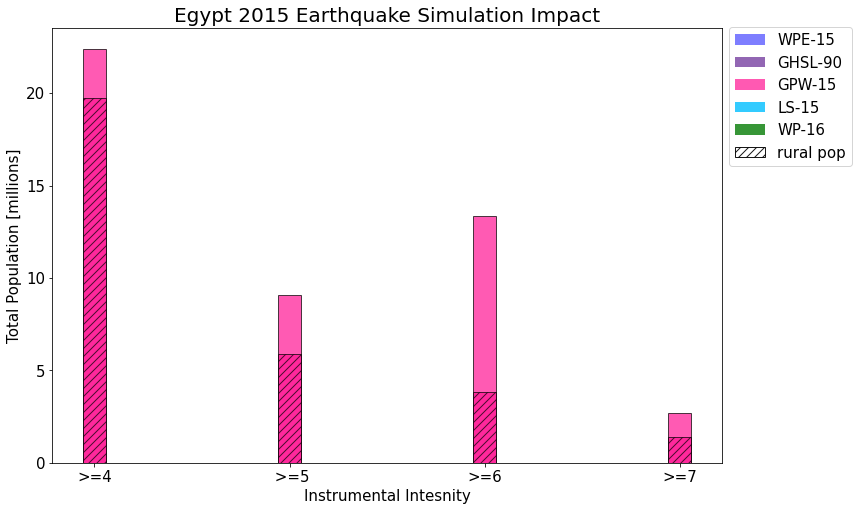

In [ ]:
# Make bar plot 
fig, axs = plt.subplots(1, 1, figsize = (12, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)
scale = 10**6

# All Quake
data = group(npl_all)

# Bar locations
a = [1-.3,2-.3,3-.3, 4-.3]
b = [1-.15,2-.15,3-.15,4-.15]
c = [1,2,3,4]
d = [1+.15,2+.15,3+.15,4+.15]
e = [1+.3,2+.3,3+.3,4+.3]

# plots
# plt.bar(a, data.ESRI16_sum / scale, width=0.12, align='center', alpha  = 0.5, color = ESRI16_c, ec = 'black')
# plt.bar(b, data.GHS15_sum / scale, width=0.12, align='center', alpha  = 0.6, color = GHS15_c, ec = 'black')
plt.bar(c, data.GPWv4_sum / scale, width=0.12, align='center', alpha  = 0.7, color = GPWv4_c, ec = 'black')
# plt.bar(d, data.LS15_sum / scale, width=0.12, align='center', alpha  = 0.8, color = LS15_c, ec = 'black')
# plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0.9, color = WP16_c, ec = 'black')

# Fake plot for rural hatch legend 
# plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0, color = 'white', ec = 'black',hatch = "///")

# rural floods
data = group(npl_rural)
# plt.bar(a, data.ESRI16_sum / scale, width=0.12, align='center', alpha  = 0.5, color = ESRI16_c, ec = 'black', hatch = "///")
# plt.bar(b, data.GHS15_sum / scale, width=0.12, align='center', alpha  = 0.6, color = GHS15_c, ec = 'black', hatch = "///")
plt.bar(c, data.GPWv4_sum / scale, width=0.12, align='center', alpha  = 0.7, color = GPWv4_c, ec = 'black', hatch = "///")
# plt.bar(d, data.LS15_sum / scale, width=0.12, align='center', alpha  = 0.8, color = LS15_c, ec = 'black', hatch = "///")
# plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0.9, color = WP16_c, ec = 'black', hatch = "///")

# legend
legend_elements = [Patch(facecolor=ESRI16_c, alpha = 0.5, edgecolor=None, label='WPE-15'),
                  Patch(facecolor=GHS15_c, alpha = 0.6, edgecolor=None, label='GHSL-90'),
                  Patch(facecolor=GPWv4_c, alpha = 0.7, edgecolor=None, label='GPW-15'),
                  Patch(facecolor=LS15_c, alpha = 0.8, edgecolor=None, label='LS-15'),
                  Patch(facecolor= WP16_c, alpha = 0.9, edgecolor=None, label='WP-16'),
                  Patch(facecolor= 'white', alpha = 0.9,  hatch = '///', edgecolor='black', label='rural pop')]
plt.legend(handles = legend_elements, bbox_to_anchor=(1, 1.02), loc='upper left', ncol=1, fontsize = 15);

# Labels / Titles
axs.set_title('Egypt 2015 Earthquake Simulation Impact', size = 20)
axs.set_xlabel('Instrumental Intesnity', fontsize = 15)
axs.set_ylabel('Total Population [millions]', fontsize = 15)

# Ticks
ticks_bar = ['>=4', ' >=5', '>=6', '>=7'];
plt.xticks([1,2,3,4], ticks_bar, fontsize = 15);
plt.yticks(fontsize = 15);

# save it out
fig_out = DATA_PATH+'FIGS/MS/Finalv1/Fig4.png'
# plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')